In [2]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings #emfanizei warnings gia allages se vivliothikes
import seaborn as sns
sns.set(rc={'xtick.labelsize':15,
           'ytick.labelsize':15})
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse


%matplotlib inline
warnings.filterwarnings("ignore")

In [109]:
df=pd.read_csv('data_final155.csv')
df = df.round(decimals=2)
pd.set_option('max_columns',40)
df.shape

(167501, 39)

In [110]:
df = df[df['cement_type_cpii_bool_pv']==0]

In [111]:
df.shape

(118302, 39)

In [113]:
df1 = df.loc[118000:]

In [5]:
df1=df.iloc[167000:,:]
df=df.loc[:167000]

In [6]:
data_cols=['separator_speed_rpm_pv','mill_dp_block_1','separator_pwr_kw_pv_lagged']
target_cols=['separator_pwr_kw_pv']

In [7]:
df.describe()

,Unnamed: 0,total_feed_ton_h_pv,clinker_ton_h_pv,limestone_ton_h_pv,slag_ton_h_pv,gypsum_ton_h_pv,pozzolane_ton_h_pv,fly_ash_1_ton_h_pv,fly_ash_2_ton_h_pv,total_feed_ton_h_sp,mill_motor_pwr_kw_pv,fan_pwr_kw_pv,fan_speed_rpm_pv,grinding_pressure_bar_sp,grinding_pressure_bar_pv,bucket_elv_mtr_pwr_kw_pv,mill_in_press_mbar_pv,mill_in_press_mbar_sp,mill_in_temp_c_pv,mill_exit_temp_c_pv,mill_dp_mbar_pv,mill_out_press_mbar_pv,separator_pwr_kw_pv,separator_speed_rpm_pv,mill_injection_water_m3_h_pv,roller_1_bed_depth_mm_pv,roller_2_bed_depth_mm_pv,roller_3_bed_depth_mm_pv,mill_vibration_mm_s_pv,gearbox_1_vibration_mm_s_pv,gearbox_2_vibration_mm_s_pv,grinding_aid_l_h_pv,cement_type_cpii_bool_pv,cement_type_cpiv_bool_pv,mill_operation,separator_pwr_kw_pv_lagged,mill_dp_block_1,mill_dp_mbar_pv_lagged
count,167001.00000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000,167001.000000
mean,83500.00000,75.753830,46.662584,3.281637,6.036720,2.337106,3.702375,7.299091,5.566169,75.625416,1066.763181,454.797819,875.363032,118.119857,116.956376,4.876033,5.390888,5.239000,142.645535,110.972472,34.973496,40.147671,57.731434,757.936552,2.014729,9.286504,6.152032,7.338021,0.818654,2.068007,2.409378,23.693516,0.294591,0.705406,0.989033,57.735929,35.085121,34.994285
std,48209.18049,13.700692,10.856314,2.662478,9.755091,0.953476,5.030169,11.850425,10.676772,13.414069,115.932129,37.375168,84.257111,3.811377,4.150291,0.154115,1.380445,1.310279,12.121216,6.791144,2.978615,5.689211,1.882896,45.859836,0.712860,15.693261,13.873897,16.628624,0.475678,0.645219,0.709656,14.562062,0.455854,0.455853,0.100229,1.906206,2.839333,2.939715
min,0.00000,25.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.500000,0.000000,0.280000,281.780000,60.000000,90.000000,4.400000,0.000000,0.000000,0.000000,61.980000,0.090000,0.370000,53.650000,34.620000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.320000,0.620000
25%,41750.00000,64.290000,38.660000,1.740000,0.000000,1.680000,0.000000,0.010000,0.060000,64.030000,1027.340000,430.570000,810.750000,120.000000,116.000000,4.780000,4.640000,4.840000,134.970000,106.960000,33.080000,38.560000,56.780000,736.500000,1.500000,2.680000,1.860000,1.490000,0.500000,2.000000,2.000000,16.930000,0.000000,0.000000,1.000000,56.780000,33.150000,33.090000
50%,83500.00000,74.170000,49.830000,2.540000,0.000000,2.000000,2.740000,0.020000,0.080000,76.500000,1076.510000,448.240000,863.210000,120.000000,118.000000,4.870000,5.090000,5.000000,141.320000,110.540000,34.900000,41.020000,57.520000,760.370000,2.110000,7.930000,3.890000,3.750000,0.760000,2.000000,2.000000,20.400000,0.000000,1.000000,1.000000,57.520000,34.960000,34.900000
75%,125250.00000,88.160000,54.860000,5.040000,19.140000,3.160000,3.740000,23.400000,0.100000,88.000000,1127.320000,474.140000,952.000000,120.000000,119.500000,4.960000,5.720000,5.380000,149.520000,113.900000,36.830000,43.000000,58.420000,784.970000,2.660000,10.780000,6.320000,8.590000,1.120000,2.500000,3.000000,25.330000,1.000000,1.000000,1.000000,58.420000,36.870000,36.830000
max,167000.00000,116.190000,79.850000,23.550000,36.030000,10.000000,24.920000,32.920000,32.310000,100.000000,2467.630000,599.370000,1190.000000,120.000000,126.000000,10.360000,31.160000,31.220000,335.740000,159.820000,65.820000,67.060000,162.000000,1046.740000,2.890000,142.000000,122.000000,186.000000,7.740000,7.000000,10.500000,75.000000,1.000000,1.000000,1.000000,162.000000,65.820000,65.560000


Εδω όρίζουμε ποιες μεταβλήτες θα χρησιμοποιήσουμε για τα μοντέλα


In [106]:
data= df[data_cols]
target=df[target_cols]

Χωρίζουμε το δείγμα σε train kai test

In [98]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.4)
sc_x = RobustScaler()
sc_x.fit(x_train)
x_train_sc = sc_x.transform(x_train)
x_test_sc = sc_x.transform(x_test)
y_test = y_test.to_numpy(copy = True).flatten()

# Knn Model

In [99]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor(n_jobs=-1)

grid = {'n_neighbors' : [20],
       'algorithm' : ['auto'],
       'p'  : [ 2,1],
       'leaf_size'  : [30],
       'weights' : ['distance']}
gs_knn = GridSearchCV(knn, grid, cv=5)
gs_knn.fit(x_train, y_train)
pred_knn = gs_knn.predict(x_test)


print("Mean Absolute Error (MAE): %.2f" % mae(y_test, pred_knn))
print("Mean Squared Error (MSE): %.2f" % mse(y_test, pred_knn))
print("R^2-score: %.2f" % r2( y_test, pred_knn))
print(gs_knn.best_estimator_)

Mean Absolute Error (MAE): 0.33
Mean Squared Error (MSE): 1.82
R^2-score: 0.50
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                    weights='distance')


Κάνουμε plot ενα διάστημα για να δούμε πως τα παει το μοντέλο μας

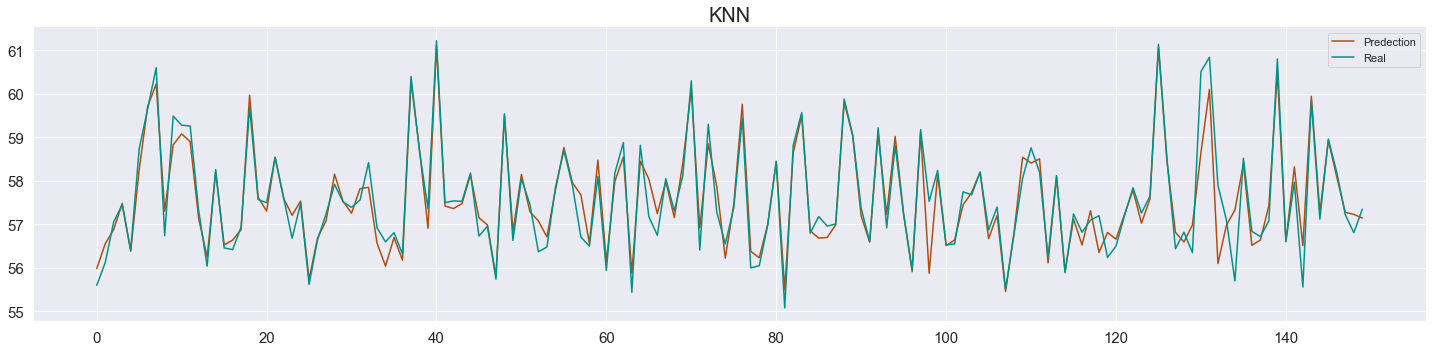

In [93]:
plt.figure(figsize=(20,5))
ax = plt.subplot(111)
ax.plot(pred_knn[800:950],color = 'xkcd:burnt sienna',label = 'Predection',lw=1.5)
ax.plot(y_test[800:950], 'xkcd:teal',label= 'Real',lw=1.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('KNN', size=20)
plt.tight_layout()
plt.legend()
plt.show()

Κάνουμε plot τα residuals

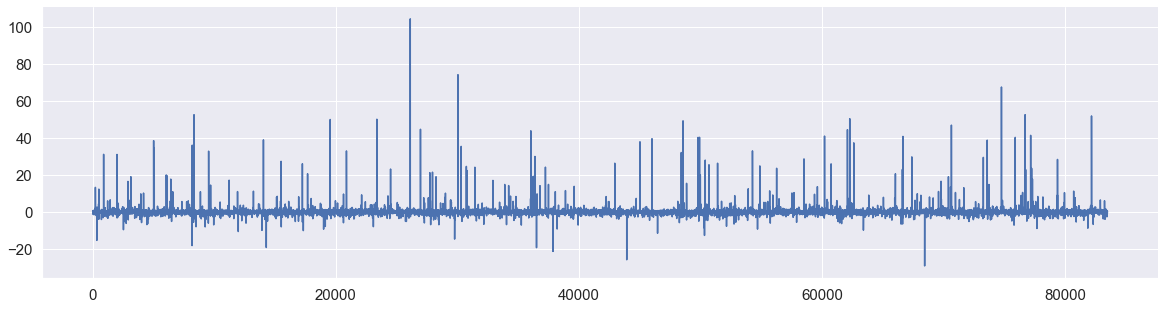

In [12]:
residual_knn = y_test - pred_knn.flatten()
plt.figure(figsize=(20,5))
ax = plt.subplot(111)
ax.plot(residual_knn)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

# MLP regressor Neural Network

In [84]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor()

grid = {'hidden_layer_sizes' : (4,),
        'solver' : [ 'adam'],
       'learning_rate' : [ 'adaptive'],
        'learning_rate_init' : [0.1, 0.01],
       'max_iter' : [50],
        'n_iter_no_change'  :  [10],
        'warm_start' : [True],
       'verbose'  :  [True],
       'validation_fraction' :[0.1]}
gs_mlp= GridSearchCV(mlp, grid, cv=5)
gs_mlp.fit(x_train, y_train)
pred_mlp = gs_mlp.predict(x_test)

print("Mean Absolute Error (MAE): %.2f" % mae(y_test, pred_mlp))
print("Mean Squared Error (MSE): %.2f" % mse(y_test, pred_mlp))
print("Root Mean Squared Error (RMSE): %.2f" % np.sqrt(np.mean((y_test- pred_mlp)**2)))
print("R^2-score: %.2f" % r2( y_test, pred_mlp))
print(gs_mlp.best_estimator_)

Iteration 1, loss = 474.79627435
Iteration 2, loss = 4.43974571
Iteration 3, loss = 3.26738195
Iteration 4, loss = 2.42873655
Iteration 5, loss = 1.89136816
Iteration 6, loss = 1.54445461
Iteration 7, loss = 1.37490489
Iteration 8, loss = 1.29202941
Iteration 9, loss = 1.30637410
Iteration 10, loss = 1.43931204
Iteration 11, loss = 1.58440116
Iteration 12, loss = 1.70848987
Iteration 13, loss = 1.63249218
Iteration 14, loss = 1.35686211
Iteration 15, loss = 1.28241583
Iteration 16, loss = 1.45584772
Iteration 17, loss = 1.72946438
Iteration 18, loss = 1.44564140
Iteration 19, loss = 1.57707041
Iteration 20, loss = 1.71323138
Iteration 21, loss = 1.65020407
Iteration 22, loss = 1.79587772
Iteration 23, loss = 1.54039827
Iteration 24, loss = 1.73470959
Iteration 25, loss = 1.99825677
Iteration 26, loss = 1.68742807
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 63.73445153
Iteration 2, loss = 1.75108543
Iteration 3, loss = 1.

Iteration 2, loss = 7.66820606
Iteration 3, loss = 7.38700578
Iteration 4, loss = 7.03389210
Iteration 5, loss = 6.61960137
Iteration 6, loss = 6.14539286
Iteration 7, loss = 5.61289015
Iteration 8, loss = 5.02381902
Iteration 9, loss = 4.36040242
Iteration 10, loss = 3.63499899
Iteration 11, loss = 2.85524759
Iteration 12, loss = 2.10600891
Iteration 13, loss = 1.55579925
Iteration 14, loss = 1.26453128
Iteration 15, loss = 1.12582001
Iteration 16, loss = 1.06951005
Iteration 17, loss = 1.03238775
Iteration 18, loss = 1.02320169
Iteration 19, loss = 1.01957044
Iteration 20, loss = 1.01408859
Iteration 21, loss = 1.04887541
Iteration 22, loss = 1.02780294
Iteration 23, loss = 1.06185382
Iteration 24, loss = 1.03933333
Iteration 25, loss = 1.08697681
Iteration 26, loss = 1.03727202
Iteration 27, loss = 1.06456119
Iteration 28, loss = 1.04711191
Iteration 29, loss = 1.03881445
Iteration 30, loss = 1.05289507
Iteration 31, loss = 1.01324599
Iteration 32, loss = 1.02936348
Iteration 33, lo

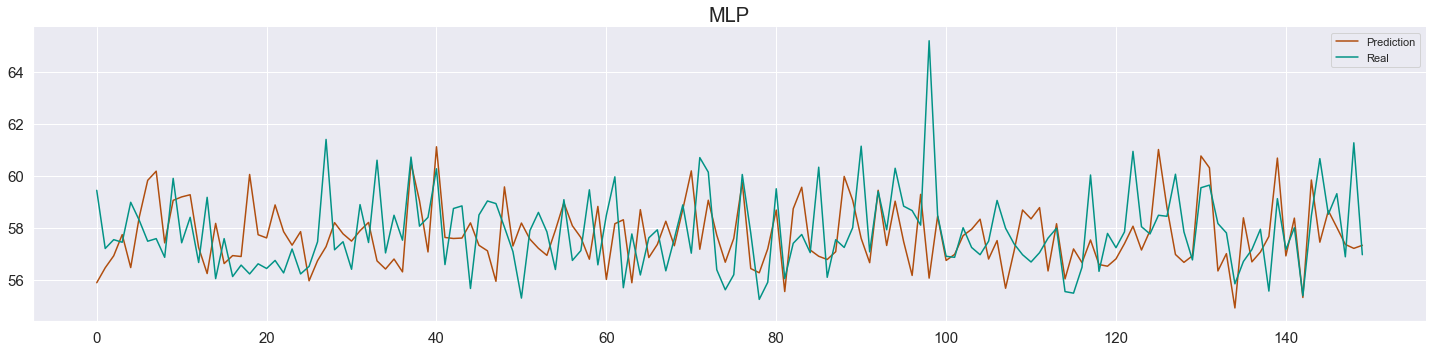

In [102]:
plt.figure(figsize=(20,5))
ax = plt.subplot(111)
ax.plot(pred_mlp[800:950],'xkcd:burnt sienna',label = 'Prediction',lw=1.5)
ax.plot(y_test[800:950], 'xkcd:teal',label = 'Real',lw=1.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('MLP', size=20)
plt.tight_layout()
plt.legend()
plt.show()

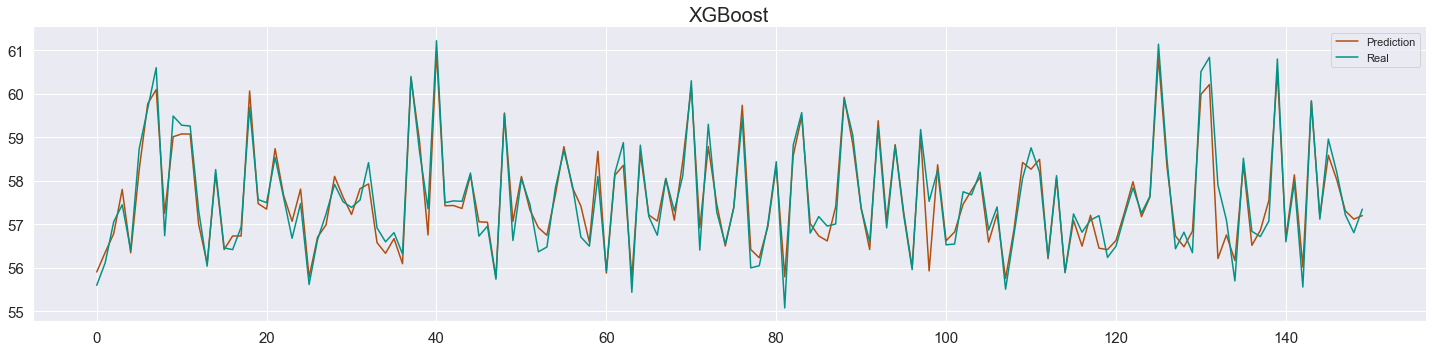

In [68]:
plt.figure(figsize=(20,5))
ax = plt.subplot(111)
ax.plot(pred_xgb[800:950],color = 'xkcd:burnt sienna' ,lw=1.5,label ='Prediction')
ax.plot(y_test[800:950], 'blue',lw=1.5, color = 'xkcd:teal',label="Real")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('XGBoost', size=20)
plt.tight_layout()
plt.legend()
plt.show()

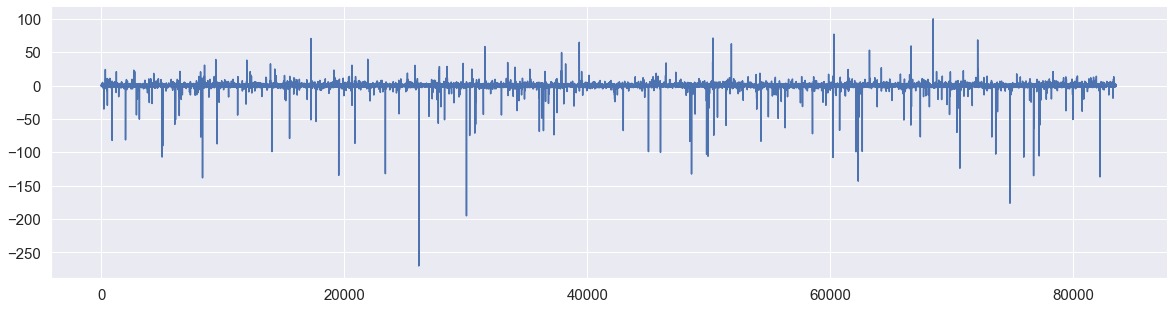

In [18]:
residual_xgb=pred_xgb-y_test.flatten()
plt.figure(figsize=(20,5))
ax = plt.subplot(111)
ax.plot((residual_xgb/max(residual_xgb))*100)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

# RandomForestRegressor

In [71]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

grid = {'n_jobs' : [-1],
        'warm_start' : [ True],
        'n_estimators' : [40],
        'criterion' : ['mse'],
        'max_leaf_nodes'  :  [30],
        'min_samples_split'  :  [5],
        'max_depth' : [5],
        'verbose' : [2]}
gs_rf = GridSearchCV(rf, grid, cv=5)
gs_rf.fit(x_train, y_train)
pred_rf = gs_rf.predict(x_test)

print("Mean Absolute Error (MAE): %.2f" % mae(y_test, pred_rf))
print("Mean Squared Error (MSE): %.2f" % mse(y_test, pred_rf))
print("Root Mean Squared Error (RMSE): %.2f" % np.sqrt(np.mean((y_test- pred_rf)**2)))
print("R^2-score: %.2f" % r2( y_test, pred_rf))
print(gs_rf.best_estimator_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent work

building tree 1 of 40
building tree 2 of 40building tree 3 of 40
building tree 4 of 40
building tree 5 of 40
building tree 6 of 40

building tree 7 of 40
building tree 8 of 40
building tree 9 of 40
building tree 10 of 40
building tree 11 of 40
building tree 12 of 40
building tree 13 of 40building tree 14 of 40

building tree 15 of 40
building tree 16 of 40
building tree 17 of 40
building tree 18 of 40
building tree 19 of 40
building tree 20 of 40
building tree 21 of 40
building tree 22 of 40
building tree 23 of 40
building tree 24 of 40
building tree 25 of 40
building tree 26 of 40
building tree 27 of 40
building tree 28 of 40
building tree 29 of 40
building tree 30 of 40
building tree 31 of 40
building tree 32 of 40
building tree 33 of 40
building tree 34 of 40

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.6s



building tree 35 of 40
building tree 36 of 40
building tree 37 of 40
building tree 38 of 40
building tree 39 of 40
building tree 40 of 40


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.0s finished


Mean Absolute Error (MAE): 0.30
Mean Squared Error (MSE): 1.45
Root Mean Squared Error (RMSE): 1.21
R^2-score: 0.57
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=30,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=2,
                      warm_start=True)


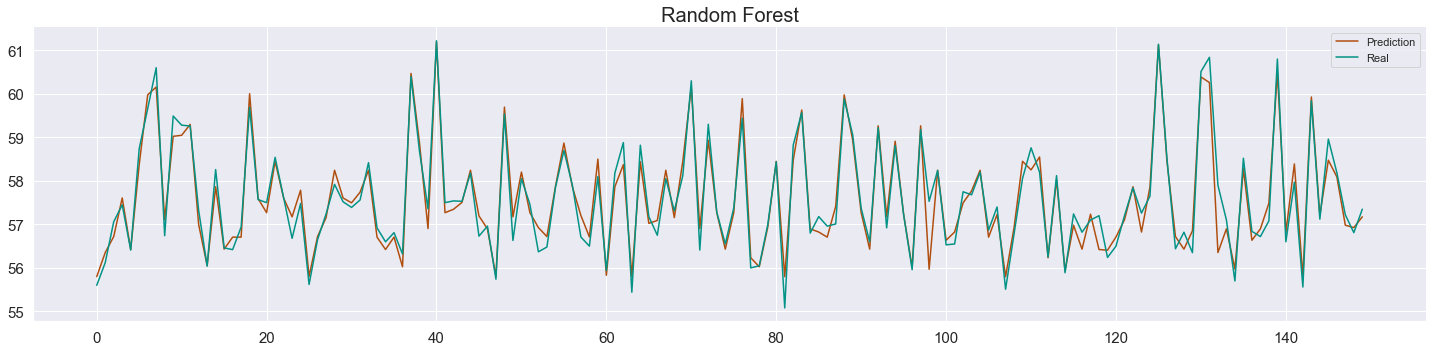

In [74]:
plt.figure(figsize=(20,5))
ax = plt.subplot(111)
ax.plot(pred_rf[800:950],color = 'xkcd:burnt sienna' ,lw=1.5,label ='Prediction')
ax.plot(y_test[800:950], color = 'xkcd:teal' ,lw=1.5,label ='Real')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Random Forest', size=20)
plt.tight_layout()
plt.legend()
plt.show()

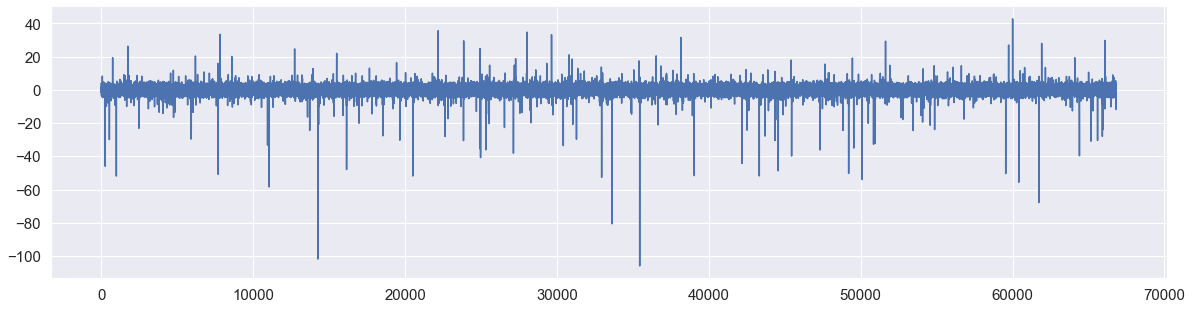

In [104]:
residual_rf = pred_rf-y_test
plt.figure(figsize=(20,5))
ax = plt.subplot(111)
ax.plot(residual_rf)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [ ]:
df2=df1[data_cols]
test = sc_x.transform(df2)
df3=df1[target_cols].to_numpy(copy=True)
pr=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=30,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=2,
                      warm_start=True)

pr.fit(x_train_sc,y_train)
pre=pr.predict(test)
print("Mean Absolute Error (MAE): %.2f" % mae(df3, pre))
print("Mean Squared Error (MSE): %.2f" % mse(df3, pre))
print("Root Mean Squared Error (RMSE): %.2f" % np.sqrt(np.mean((df3- pre)**2)))
print("R^2-score: %.2f" % r2( df3, pre))


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 40building tree 2 of 40

building tree 3 of 40
building tree 4 of 40
building tree 5 of 40
building tree 6 of 40building tree 7 of 40

building tree 8 of 40
building tree 9 of 40
building tree 10 of 40
building tree 11 of 40
building tree 12 of 40building tree 13 of 40
building tree 14 of 40

building tree 15 of 40building tree 16 of 40

building tree 17 of 40
building tree 18 of 40
building tree 19 of 40
building tree 20 of 40
building tree 21 of 40
building tree 22 of 40
building tree 23 of 40
building tree 24 of 40
building tree 25 of 40
building tree 26 of 40
building tree 27 of 40
building tree 28 of 40
building tree 29 of 40
building tree 30 of 40building tree 31 of 40building tree 32 of 40




[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s


building tree 33 of 40
building tree 34 of 40
building tree 35 of 40
building tree 36 of 40
building tree 37 of 40
building tree 38 of 40
building tree 39 of 40building tree 40 of 40



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.0s finished


Mean Absolute Error (MAE): 0.28
Mean Squared Error (MSE): 1.20


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.0s finished


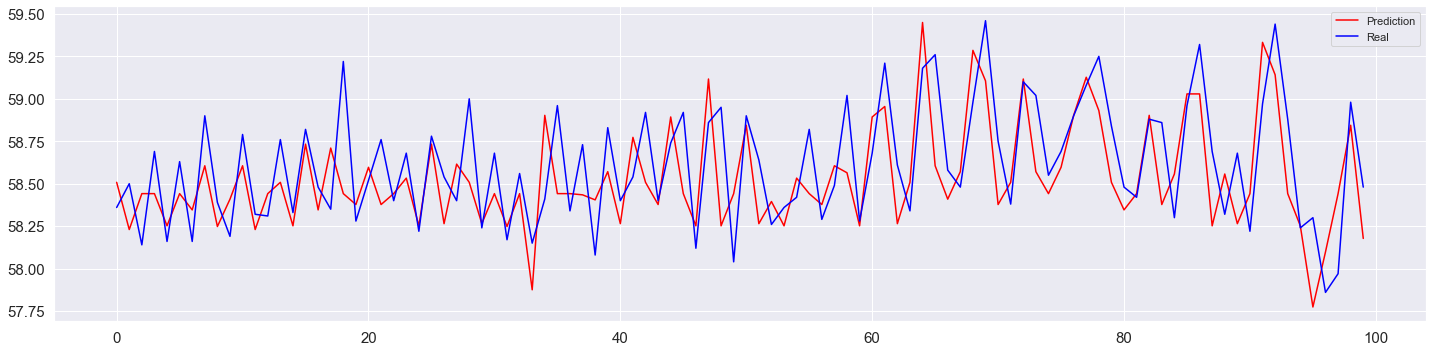

In [107]:
plt.figure(figsize=(20,5))
pre=pr.predict(test)
plt.plot(pre[200:300],'red', label = 'Prediction')
plt.plot(df3[200:300],'blue',label = 'Real')
plt.legend()
plt.tight_layout()

In [44]:
h = df[df['cement_type_cpii_bool_pv']==0]
g = df[df['cement_type_cpii_bool_pv']==1]
h=h['separator_pwr_kw_pv']
g = g['separator_pwr_kw_pv']
import statsmodels.stats.api as sms

X1, X2 = g , h

cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
print (cm.tconfint_diff(usevar='unequal'))

(0.9518112543544116, 0.9948936305620596)


In [108]:
df1

,Unnamed: 0,date,total_feed_ton_h_pv,clinker_ton_h_pv,limestone_ton_h_pv,slag_ton_h_pv,gypsum_ton_h_pv,pozzolane_ton_h_pv,fly_ash_1_ton_h_pv,fly_ash_2_ton_h_pv,total_feed_ton_h_sp,mill_motor_pwr_kw_pv,fan_pwr_kw_pv,fan_speed_rpm_pv,grinding_pressure_bar_sp,grinding_pressure_bar_pv,bucket_elv_mtr_pwr_kw_pv,mill_in_press_mbar_pv,mill_in_press_mbar_sp,mill_in_temp_c_pv,mill_exit_temp_c_pv,mill_dp_mbar_pv,mill_out_press_mbar_pv,separator_pwr_kw_pv,separator_speed_rpm_pv,mill_injection_water_m3_h_pv,roller_1_bed_depth_mm_pv,roller_2_bed_depth_mm_pv,roller_3_bed_depth_mm_pv,mill_vibration_mm_s_pv,gearbox_1_vibration_mm_s_pv,gearbox_2_vibration_mm_s_pv,grinding_aid_l_h_pv,cement_type_cpii_bool_pv,cement_type_cpiv_bool_pv,mill_operation,separator_pwr_kw_pv_lagged,mill_dp_block_1,mill_dp_mbar_pv_lagged


In [24]:
print(sms.DescrStatsW(X1))